In [1]:
import run_ebmetad.analyze as analyze
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import scipy as sp
import seaborn as sns
%matplotlib inline
sns.set(style="dark")
sns.set_palette("Set1")

In [38]:
prop = fm.FontProperties(fname='/usr/share/fonts/truetype/open-sans/OpenSans-Regular.ttf')
# Say, "the default sans-serif font is COMIC SANS"
plt.rcParams['font.sans-serif'] = "Roboto"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 18

In [39]:
exp_file = '../run_ebmetad/data/pair_data.json'
sim_file = '../../../gdrive-desktop/ebmetad/ensemble_count_data.json'

In [40]:
mydata = analyze.MultiPairAnalysis()
mydata.load_experimental_data(exp_file)
mydata.load_sim_data(sim_file)
mydata.js()
names = np.sort(mydata.get_names())[::-1]

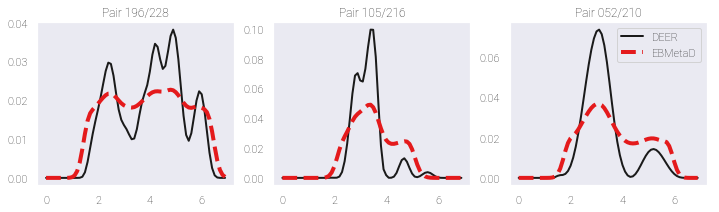

In [41]:
bins = mydata.get('bins')
i=1
plt.figure(figsize=(12,3))
for pair in names:
    plt.subplot(1,3,i)
    plt.plot(bins, 
             mydata.get('exp_distribution', pair), 
             label="DEER", 
             color='k', 
             linewidth=2)
    
    plt.plot(bins, 
             mydata.get('ensemble_avg_distribution', pair), 
             label="EBMetaD", 
             linewidth=4, 
             linestyle='--')
    
    pair_title = pair.replace("_", "/")
    plt.title("Pair {}".format(pair_title))
    i+=1
plt.legend()
plt.savefig("../../../gdrive-desktop/ebmetad/ebmetad_results.pdf", 
            bbox_inches="tight")

In [6]:
np.std(list(mydata.get('js').values()))

0.004628979482766114

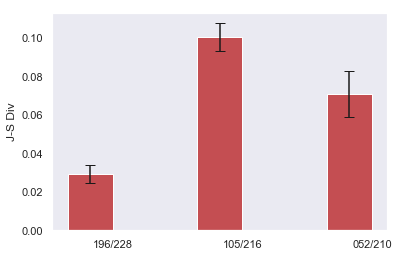

In [37]:
N = len(names)

means = []
std = []
for name in names:
    js = list(mydata.get('js', name=name).values())
    means.append(np.mean(js))
    std.append(np.std(js))
    
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, means, width, color='r', yerr=std, capsize=5)

# add some text for labels, title and axes ticks
ax.set_ylabel('J-S Div')
ax.set_xticks(ind + width / 2)
pair_titles = [pair.replace("_", "/") for pair in names]
ax.set_xticklabels(pair_titles)
plt.savefig("../../../gdrive-desktop/ebmetad/ebmetad_js.pdf", 
            bbox_inches="tight")